<!--
SPDX-FileCopyrightText: 2022 The eminus developers
SPDX-License-Identifier: Apache-2.0
-->
# Visualization

In [1]:
from eminus import Atoms, read, SCF
from eminus.extras import view, view_atoms, view_contour, view_file

In [2]:
# View the initial xyz file
mol = view_file("CH4.xyz")
mol

XYZ file comment: "Experimental geometry from CCCBDB: https://cccbdb.nist.gov/exp2x.asp?casno=74828&charge=0"


/home/wangenau/Documents/eminus/.venv/lib/python3.12/site-packages/nglview/__init__.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/home/wangenau/Documents/eminus/.venv/lib/python3.12/site-packages/pkg_resources/__init__.py:3146: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('sphinxcontrib')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)


NGLWidget()

In [3]:
# Render the view as an image, e.g., to download it
# See the options here: https://nglviewer.org/nglview/latest/api.html#nglview.NGLWidget.render_image
mol_img = mol.render_image()
mol_img.width = "400px"
mol_img

Image(value=b'', width='400px')

In [4]:
# Create the Atoms object
atoms = Atoms(*read("CH4.xyz"), center=True)
atoms.s = 50

XYZ file comment: "Experimental geometry from CCCBDB: https://cccbdb.nist.gov/exp2x.asp?casno=74828&charge=0"


In [5]:
# The calculations and writing steps have already been done, uncomment them if you want to do them for yourself
# from eminus import USCF, write_cube, write_xyz
# from eminus.extras import get_fods

# Do the DFT calculation
# scf = USCF(atoms)
# scf.run()

# Calculate FODs and write them to a xyz file
# fods = get_fods(scf.atoms)
# write_xyz(scf.atoms, "CH4_fods.xyz", fods)

# Write the density to a cube file
# write_cube(scf, "CH4_density.cube", scf.n)

# One can even display FODs or the density without writing them to files
# view_atoms(scf, fods, plot_n=True)

In [6]:
# View molecule with FODs with the GUI enabled
view_file("CH4_fods.xyz", gui=True)

ThemeManager()

XYZ file comment: "File generated with eminus 2.5.0 on Mon Jul 31 12:23:45 2023"


NGLWidget(gui_style='ngl')

In [7]:
# Display the cube file
view_file("CH4_density.cube")

CUBE file comment: "File generated with eminus 2.5.0 on Mon Jul 31 12:23:45 2023
"


NGLWidget()

In [8]:
# Use a smaller grid and display it along with the atom positions
atoms.s = [10] * 3
atoms.build()
view_atoms(atoms, atoms.r)

In [9]:
# Similar to the `write` method we can also use the `view` method of some classes
atoms.view()

In [10]:
# The view_file function can also handle lists of files
# One can use the view function to call the respective function automatically
view(["CH4_fods.xyz", "CH4_density.cube"]);

interactive(children=(Dropdown(description='filename', options=('CH4_fods.xyz', 'CH4_density.cube'), value='CH…

In [11]:
# Do two identical calculations for different pseudopotentials
atoms1 = Atoms("Li2", [[0, 0, 0], [0, 0, 5]], ecut=5, center=True)
atoms1.Z = 1
scf1 = SCF(atoms1)
scf1.run()
atoms3 = Atoms("Li2", [[0, 0, 0], [0, 0, 5]], ecut=5, center=True)
atoms3.Z = 3
scf3 = SCF(atoms3)
scf3.run();

Start auto minimization...
Method  Iteration  Etot [Eh]    dEtot [Eh]   |Gradient|   
pccg           1   +1.157076    
pccg           2   +0.334852    -8.2222e-01  [+1.40e+02]  
pccg           3   +0.009015    -3.2584e-01  [+1.52e+01]  
pccg           4   -0.206053    -2.1507e-01  [+3.65e+00]  
pccg           5   -0.333330    -1.2728e-01  [+1.04e+00]  
pccg           6   -0.393867    -6.0537e-02  [+2.37e-01]  
pccg           7   -0.419961    -2.6094e-02  [+5.50e-02]  
pccg           8   -0.430345    -1.0384e-02  [+1.74e-02]  
pccg           9   -0.433626    -3.2814e-03  [+5.70e-03]  
pccg          10   -0.434401    -7.7452e-04  [+1.65e-03]  
pccg          11   -0.434619    -2.1832e-04  [+4.72e-04]  
pccg          12   -0.434671    -5.1651e-05  [+1.16e-04]  
pccg          13   -0.434680    -9.6756e-06  [+2.34e-05]  
pccg          14   -0.434682    -1.6292e-06  [+3.99e-06]  
pccg          15   -0.434682    -3.1583e-07  [+7.75e-07]  
pccg          16   -0.434682    -7.3089e-08  [+1.72e-07

In [12]:
# Display the contour lines of the density
# One can see the missing density around the atoms
view_contour(scf1, scf1.n)

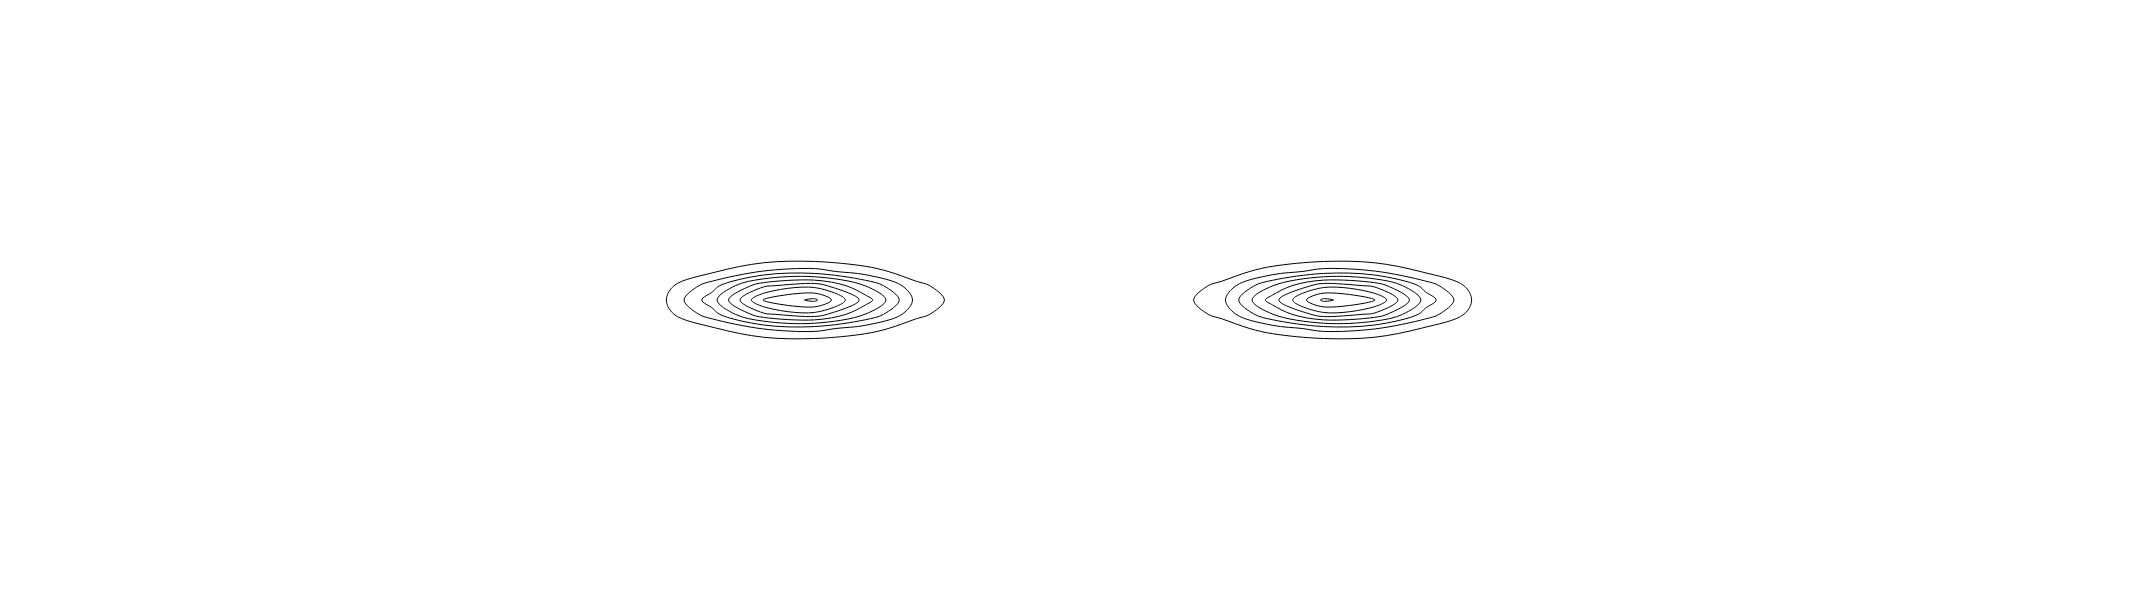

In [13]:
# Here one can see the density around the atoms
view_contour(scf3, scf3.n)

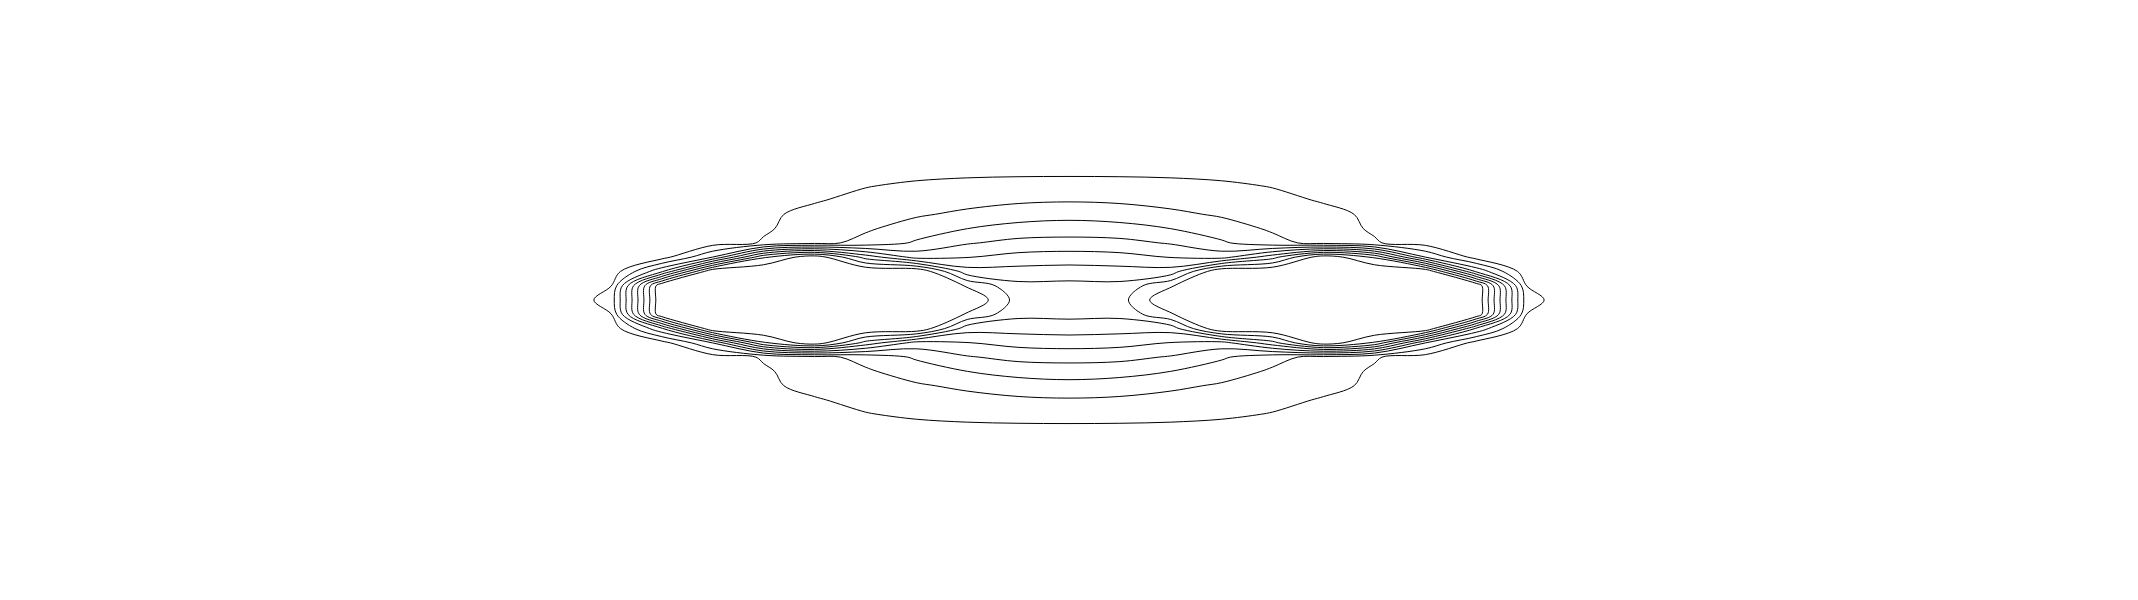

In [14]:
# Adjusting the limits of the density gives a more comparable result
view_contour(scf3, scf3.n, limits=(0, 0.02))